# Multiprocessing using Pools 
A simple framework for assessing the impact of multiprocessing on runtime on a multi-core machine. 

In [49]:
import time
import math
import multiprocessing
from multiprocessing import Pool

import psutil


from matplotlib import pyplot as plt


from function import my_func, my_func_verbose

# A function for timing a job that uses a pool of processes.
#  f is a function that takes a single argument
#  data is an array of arguments on which f will be mapped
#  pool_size is the number of processes in the pool. 
def pool_process(f, data, pool_size):
    tp1 = time.time()
    pool = Pool(processes=pool_size) # initialize the Pool.
    result = pool.map(f, data)       # map f to the data using the Pool of processes to do the work 
    pool.close() # No more processes
    pool.join()  # Wait for the pool processing to complete. 
    print("Results", result)
    
    print("Overall Time:", int(time.time()-tp1))
 

#### Checking the number of logical CPUs: 

In [39]:
multiprocessing.cpu_count()


4

#### Checking the number of physical CPUs:

In [40]:
psutil.cpu_count(logical = False)


2

In [41]:
# def my_func(x):
#     s = math.sqrt(x)
#     return s

In [42]:
# This verbose version shows which process in the pool is running each task. 
# def my_func_verbose(x):
#     s = math.sqrt(x)
#     print("Task", multiprocessing.current_process(), x, s)
#     return s

In [43]:
dataRange = range(20)

Use the pool_process function to apply my_func to the data in dataRange.  
This task is so light it requires very little processing time. 

In [6]:
pool_process(my_func, dataRange, 2)

Results [0.0, 1.0, 1.4142135623730951, 1.7320508075688772, 2.0, 2.23606797749979, 2.449489742783178, 2.6457513110645907, 2.8284271247461903, 3.0, 3.1622776601683795, 3.3166247903554, 3.4641016151377544, 3.605551275463989, 3.7416573867739413, 3.872983346207417, 4.0, 4.123105625617661, 4.242640687119285, 4.358898943540674]
Overall Time: 0


## A naive function for checking primes 

In [7]:
from function import check_prime


In [8]:
# def check_prime(num):
#     t1 = time.time()
#     res = False
#     if num > 0:
#         # check for factors
#         for i in range(2,num):
#             if (num % i) == 0:
#                 print(num,"is not a prime number")
#                 print(i,"times",num//i,"is",num)
#                 print("Time:", int(time.time()-t1))
#                 break
#         else:
#             print(num,"is a prime number")
#             print("Time:", time.time()-t1) 
#             res = True
#             # if input number is less than
#             # or equal to 1, it is not prime
#     return res


In [9]:
check_prime(15488801)

15488801 is a prime number
Time: 1.8631513118743896


True

In [10]:
check_prime(15488803)

15488803 is not a prime number
11 times 1408073 is 15488803
Time: 0


False

### Generating sets of work to be processed by the pool. The speedup will be quantified by using an increasing amount of cores:

### With 2 prime numbers:

In [14]:
data = [12281671, 12281693]
pool_process(check_prime, data, 1)

Results [True, True]
Overall Time: 2


In [15]:
data = [12281671, 12281693]
pool_process(check_prime, data, 2)

Results [True, True]
Overall Time: 2


In [16]:
data = [12281671, 12281693]
pool_process(check_prime, data, 3)

Results [True, True]
Overall Time: 2


In [17]:
data = [12281671, 12281693]
pool_process(check_prime, data, 4)

Results [True, True]
Overall Time: 2


### With 4 prime numbers

In [18]:
data = [12281671, 12281693, 12281707, 12281713]
pool_process(check_prime, data, 1)

Results [True, True, True, True]
Overall Time: 5


In [19]:
data = [12281671, 12281693, 12281707, 12281713]
pool_process(check_prime, data, 2)

Results [True, True, True, True]
Overall Time: 3


In [20]:
data = [12281671, 12281693, 12281707, 12281713]
pool_process(check_prime, data, 3)

Results [True, True, True, True]
Overall Time: 3


In [21]:
data = [12281671, 12281693, 12281707, 12281713]
pool_process(check_prime, data, 4)

Results [True, True, True, True]
Overall Time: 3


### With 8 prime numbers:

In [22]:
data = [12281671,12281693,12281707,12281713,12281719,12281729,12281767,12281813]
pool_process(check_prime, data, 1)

Results [True, True, True, True, True, True, True, True]
Overall Time: 11


In [23]:
data = [12281671,12281693,12281707,12281713,12281719,12281729,12281767,12281813]
pool_process(check_prime, data, 2)

Results [True, True, True, True, True, True, True, True]
Overall Time: 7


In [24]:
data = [12281671,12281693,12281707,12281713,12281719,12281729,12281767,12281813 ]
pool_process(check_prime, data, 3)

Results [True, True, True, True, True, True, True, True]
Overall Time: 6


In [25]:
data = [12281671,12281693,12281707,12281713,12281719,12281729,12281767,12281813 ]
pool_process(check_prime, data, 4)

Results [True, True, True, True, True, True, True, True]
Overall Time: 6


### With 16 prime numbers:

In [26]:
data = [12281671, 12281693, 12281707, 12281713, 12281719, 12281729, 12281767, 12281813, 12281827, 12281831, 12281881, 12281909, 12281947, 12281963, 12281981, 12281987]
pool_process(check_prime, data, 1)

Results [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Overall Time: 24


In [27]:
data = [12281671, 12281693, 12281707, 12281713, 12281719, 12281729, 12281767, 12281813, 12281827, 12281831, 12281881, 12281909, 12281947, 12281963, 12281981, 12281987]
pool_process(check_prime, data, 2)

Results [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Overall Time: 15


In [28]:
data = [12281671, 12281693, 12281707, 12281713, 12281719, 12281729, 12281767, 12281813, 12281827, 12281831, 12281881, 12281909, 12281947, 12281963, 12281981, 12281987]
pool_process(check_prime, data, 3)

Results [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Overall Time: 13


In [29]:
data = [12281671, 12281693, 12281707, 12281713, 12281719, 12281729, 12281767, 12281813, 12281827, 12281831, 12281881, 12281909, 12281947, 12281963, 12281981, 12281987]
pool_process(check_prime, data, 4)

Results [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Overall Time: 13


### Plotting result

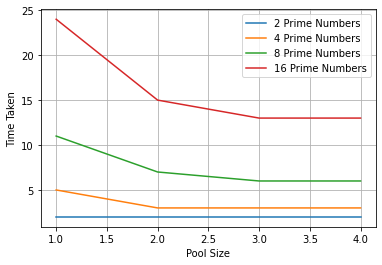

In [52]:
number_cores= [1,2,3,4]
two_prime_result = [2,2,2,2]
four_prime_result = [5,3,3,3]
eight_prime_result = [11,7,6,6]
sixteen_prime_result = [24,15,13,13]


plt.xlabel('Pool Size')
plt.ylabel('Time Taken')
plt.plot(number_cores,two_prime_result, label ='2 Prime Numbers')
plt.plot(number_cores, four_prime_result, label ='4 Prime Numbers')
plt.plot(number_cores, eight_prime_result, label ='8 Prime Numbers')
plt.plot(number_cores, sixteen_prime_result, label ='16 Prime Numbers')

plt.grid()
plt.legend()
plt.show()